## Data Splits


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

### Read the data

In [5]:
# Read the data
df_data = pd.read_csv('../data/2d_classification.csv')

### Plot the data

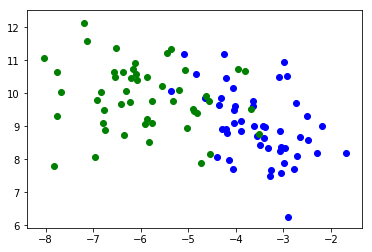

In [7]:
colors = {0:'b', 1:'g', 2:'r', 3:'c', 4:'m', 5:'y', 6:'k'}

plt.figure()
unq_labels = np.unique(df_data['label'])
for i in unq_labels:
    df = df_data.loc[df_data['label'] == i][['x','y']]
    x = df['x']
    y = df['y']
    plt.scatter(x, y, c=colors[i], alpha=1)

In [8]:
data = df_data[['x','y']].values
label = df_data['label'].values

<img src='img/original_to_class.png'>

## Dividing the data into Train and Test data

- Using the complete dataset for training, we are not generalizing the model for unseen data
- A small set of data should be a holdout dataset on which a model can be tested
- The __holdout set__ will say how good your model is w.r.t. unknown data - __Test Data__

<img src='img/train_test_split.png'>

- sklearn has an inbuilt method - __[train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)__
- parameters 
    - data -> data to be split
    - test_size -> between 0 & 1, denoting the ratio to be allocated for test data
    - shuffle -> randomly shuffle before splitting the data
    - stratify -> Try to maintain the class balance in both training and test data sets

#### Things to consider
- Do not use the test data in any form
- Do not use it for hyper-parameter tuning

## Train-Test Splits 

In [10]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.20, 
                                                                  random_state=0, stratify=None)

__Train-test ratio of the split data__

In [13]:
print('Complete data:', data.shape)
print('Labels distribution', Counter(label))
print('Train Data:', data_train.shape, 'Test Data:', data_test.shape)

Complete data: (100, 2)
Labels distribution Counter({1: 50, 0: 50})
Train Data: (80, 2) Test Data: (20, 2)


__How the data is split__

In [14]:
from collections import Counter
print('Training Data split', Counter(label_train))
print('Testing Data split', Counter(label_test))

Training Data split Counter({0: 42, 1: 38})
Testing Data split Counter({1: 12, 0: 8})


### Stratified split
- Used to make sure that the class imbalance doesn't affect the distribution of class labels in the train-test data set

<img src='img/stratified_split.png'>

In [15]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.20, 
                                                                  random_state=0, stratify=label)

print('Complete data:', data.shape)
print('Labels distribution', Counter(label))
print('Train Data:', data_train.shape, 'Test Data:', data_test.shape)

from collections import Counter
print('Training Data split', Counter(label_train))
print('Testing Data split', Counter(label_test))

Complete data: (100, 2)
Labels distribution Counter({1: 50, 0: 50})
Train Data: (80, 2) Test Data: (20, 2)
Training Data split Counter({1: 40, 0: 40})
Testing Data split Counter({1: 10, 0: 10})


## Random Sampling
- Sample a data multiple time with a certain ratio (example: 80% of the data is randomly sampled)
- Iterate the process again for n-iterations with replacement
- Since it is random sampling, doesn't not guarantee that each data point was tested

## Cross-Validation

### k-fold cross validation
- Divide the dataset into ___k___ subsets
- Select a subset, use that as the test data and the remaining as the train data
- Repeat this for k iterations, so that all the subsets are used as test data

<img src='img/train_to_subsets.png'>

<img src='img/k_fold_cv.png'>

### Leave-one-out CV

- Set the number of folds to the number of training instances
- Each iteration, train on the complete dataset except one
- No random subsampling
- Computationally expensive - n-iterations
